<center>
<p style="text-align: center;"><b><i>Exploratory Data Analysis and Data Cleaning on the Titanic Dataset</i></b></p>

</center>

<p align="center">
  <img src="https://itg.com.pl/wp-content/uploads/2023/12/titanic-1536x878.webp"
alt="Titanic Dataset" width="800"/>
</p>

# **Dataset Overview**

**PassengerId**: A unique identifier for each passenger.<br>
**Survived**: Indicates whether the passenger survived (1) or not (0).<br>
**Pclass**: The class in which the passenger was traveling (1st, 2nd, or 3rd class).<br>
**Name**: The name of the passenger.<br>
**Sex**: The gender of the passenger (male or female).<br>
**Age**: The age of the passenger.<br>
**SibSp**: The number of siblings or spouses the passenger had aboard the Titanic.<br>
**Parch**: The number of parents or children the passenger had aboard the Titanic.<br>
**Ticket**: The ticket number of the passenger.<br>
**Fare**: The amount of money the passenger paid for the ticket.<br>
**Cabin**: The cabin number where the passenger stayed.<br>
**Embarked**: The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).<br>

# Imports & Reading Data

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pandas.plotting as pd_plotting
%matplotlib inline

In [274]:
# Load the CSV file 'train.csv'
df = pd.read_csv('train.csv')

# Data Understanding

In [275]:
# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [276]:
# Display the last few rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [277]:
# Data type
type(df )

pandas.core.frame.DataFrame

In [278]:
# Data size
df.shape

(891, 12)

In [279]:
# Data types of each column
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [280]:
# Count the number of occurrences of elements in df
df.count()

,0
PassengerId,891
Survived,891
Pclass,891
Name,891
Sex,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [281]:
# More information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [282]:
# List columns
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

# Data Preparation

In [283]:
# Count of missing values in each column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [284]:
# Filling missing values in 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [285]:
# Dropping the 'Cabin' column due to a high number of missing values
df.drop('Cabin', axis=1, inplace=True)

In [286]:
# Filling missing values in 'Embarked' with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [287]:
# Count of missing values in each column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [288]:
# Count of duplicate rows in the DataFrame
df.duplicated().sum()

0

In [289]:
# Create a new column 'FamilySize' by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch']

In [290]:
# Delete the 'SibSp' and 'Parch' columns
df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [291]:
# Delete the 'PassengerId' column from the DataFrame
df.drop(columns=['PassengerId'], inplace=True)

In [292]:
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


In [293]:
# Get descriptive statistics for all columns, including categorical data
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize
count,891.000000,891.000000,891,891,891.000000,891,891.000000,891,891.000000
unique,NaN,NaN,891,2,NaN,681,NaN,3,NaN
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,347082,NaN,S,NaN
freq,NaN,NaN,1,577,NaN,7,NaN,646,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,NaN,32.204208,NaN,0.904602
std,0.486592,0.836071,NaN,NaN,13.019697,NaN,49.693429,NaN,1.613459
min,0.000000,1.000000,NaN,NaN,0.420000,NaN,0.000000,NaN,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,NaN,7.910400,NaN,0.000000
50%,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.454200,NaN,0.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,NaN,31.000000,NaN,1.000000


In [294]:
# Identify categorical columns in the DataFrame
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
print(categorical_vars.tolist())

['Name', 'Sex', 'Ticket', 'Embarked']


In [295]:
# Identify numerical columns in the DataFrame
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_vars.tolist())

['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']


 # Univariate descriptive analysis

## Quantitative

In [296]:
# Generate descriptive statistics for the 'Fare' column
df["Fare"].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [297]:
# The mean value of the 'Fare' column
df.Fare.mean()

32.204207968574636

In [298]:
# The standard deviation of the 'Fare' column
df.Fare.std()

49.6934285971809

In [299]:
# The variance of the 'Fare' column
df.Fare.var()

2469.436845743116

In [300]:
# The minimum value of the 'Fare' column
df.Fare.min()

0.0

In [301]:
# The maximum value of the 'Fare' column
df.Fare.max()

512.3292

In [302]:
# The median value of the 'Fare' column
df.Fare.median()

14.4542

In [303]:
# The quantiles (1%, 10%, 90%, 99%) of the 'Fare' column
df.Fare.quantile([.01, .1 , .9, .99])

,Fare
0.01,0.00000
0.10,7.55000
0.90,77.95830
0.99,249.00622


Quantiles are used to understand the distribution of data by dividing it into intervals based on the data's rank. In simpler terms, they help identify the data's spread and central tendency.

*   1st Quantile (1%): This quantile represents the value below which 1% of the data falls.
*   10th Quantile (10%): This quantile represents the value below which 10% of the data falls.
*   90th Quantile (90%): This quantile represents the value below which 90% of the data falls.
*   99th Quantile (99%): This quantile represents the value below which 99% of the data falls.










In [304]:
# Perform a normality test on the Fare column of the df dataset
scipy.stats.normaltest(df.Fare)

NormaltestResult(statistic=904.5872705326926, pvalue=3.727091062842147e-197)

In [305]:
# Use "scipy.stats.shapiro()" to perform a Shapiro-Wilk normality test on the Fare column
scipy.stats.shapiro(df.Fare)

ShapiroResult(statistic=0.5218913010396559, pvalue=1.0840444395829658e-43)

<Axes: >

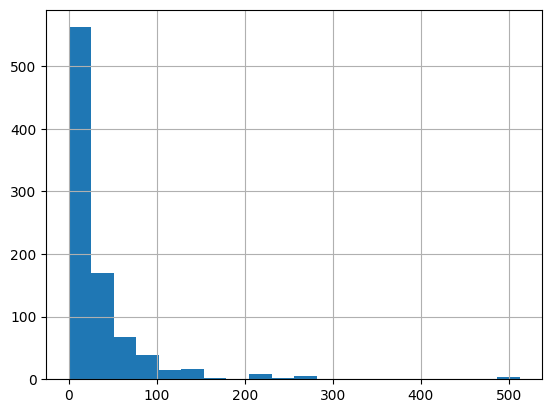

In [306]:
# Make a histogram for the Fare column with bins=20
df.Fare.hist(bins = 20)

<Axes: >

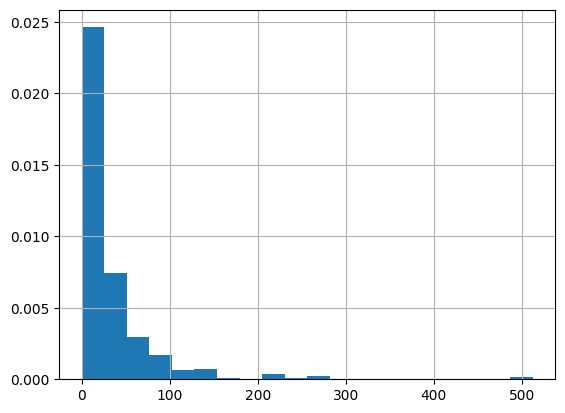

In [307]:
# Create the histogram with Normalization
df.Fare.hist(bins = 20, density= True)

<Axes: ylabel='Density'>

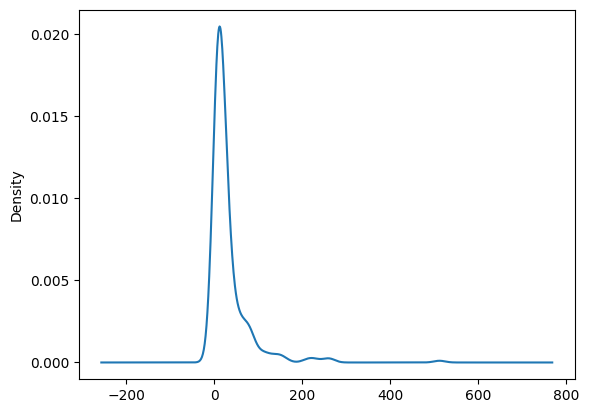

In [308]:
# Generate a Kernel Density Estimation (KDE) graph of the Fare column
df.Fare.plot(kind = "kde")

<Axes: ylabel='Density'>

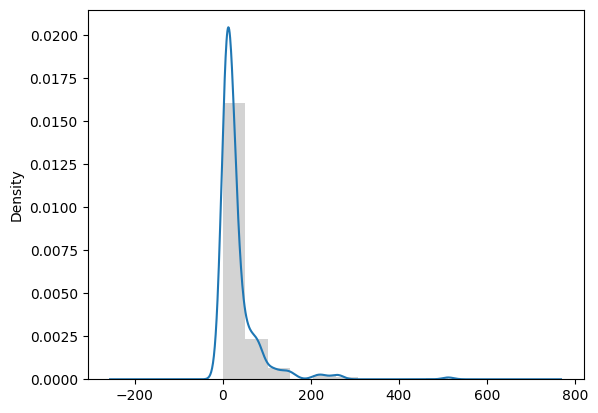

In [309]:
# Have density and histogram on the same graph of Fare column
df.Fare.plot(kind = "hist", density = True, color = "lightgrey")
df.Fare.plot(kind = "kde")

<Axes: >

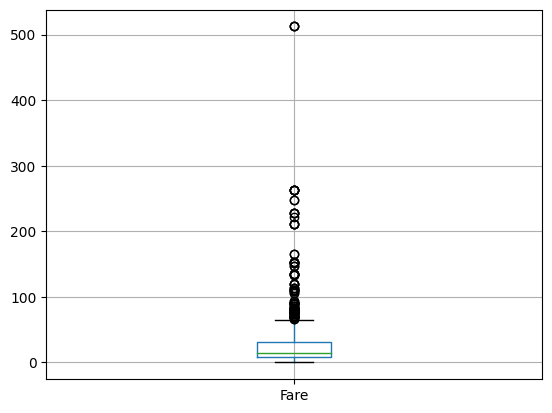

In [310]:
# Creates a boxplot for the 'Fare' column
df.boxplot(column = "Fare")

<Axes: >

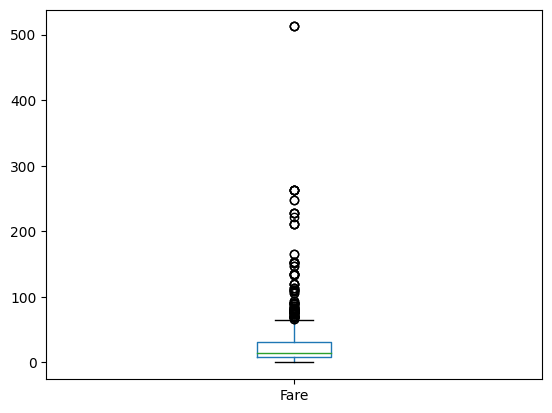

In [311]:
# Remove the grid
df.boxplot(column = "Fare", grid = False)

## Qualitative

In [312]:
# Generate descriptive statistics for the 'Sex' column
df.Sex.describe()

,Sex
count,891
unique,2
top,male
freq,577


In [313]:
# The unique values present in the 'Sex' column
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [314]:
# Counts the number of occurrences of each unique value in the 'Sex' column
df.Sex.value_counts()

,count
Sex,
male,577
female,314


In [315]:
# Cross-tabulation of the 'Sex' column, counting the frequency of each category (Male and Female).
pd.crosstab(df.Sex, "freq")

col_0,freq
Sex,
female,314
male,577


In [316]:
# Cross-tabulation of the 'Sex' column with normalized frequency counts.
pd.crosstab(df.Sex, "freq", normalize=True)

col_0,freq
Sex,
female,0.352413
male,0.647587


In [317]:
t = pd.crosstab(df.Sex, "freq")
# Perform a chi-square test on the frequency counts
scipy.stats.chisquare(t)

Power_divergenceResult(statistic=array([77.63075196]), pvalue=array([1.24220953e-18]))

<Axes: xlabel='Sex'>

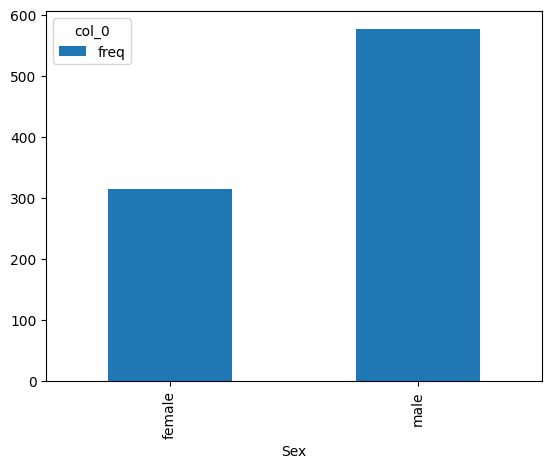

In [318]:
t = pd.crosstab(df.Sex, "freq")
# Plot a bar chart of the frequency counts for each category in the 'Sex' column
t.plot.bar()

<Axes: xlabel='Sex'>

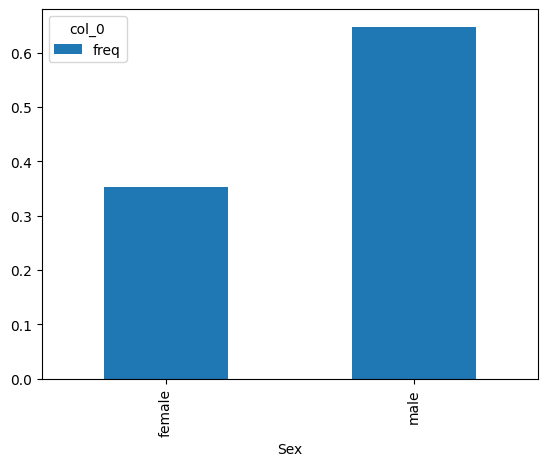

In [319]:
# Display the Bar Chart by normalizing the frequencies
t = pd.crosstab(df.Sex, "freq", normalize=True) #Solution
t.plot(kind = "bar")

array([<Axes: ylabel='freq'>], dtype=object)

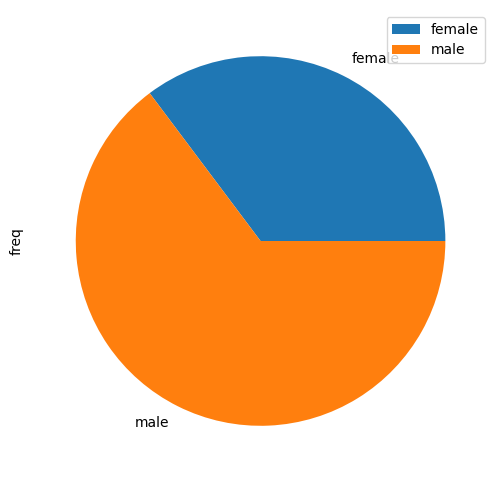

In [320]:
t = pd.crosstab(df.Sex, "freq")
# Plot a pie chart to visualize the distribution of frequencies for each category in the 'Sex' column
t.plot.pie(subplots=True, figsize = (6, 6))

# Bivariate descriptive analysis

## Quantitative - Quantitative

In [321]:
# Select only numeric columns
variables_quantitatives = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
matrice_corr = variables_quantitatives.corr()

# Show correlation matrix
print(matrice_corr)

            Survived    Pclass       Age      Fare  FamilySize
Survived    1.000000 -0.338481 -0.064910  0.257307    0.016639
Pclass     -0.338481  1.000000 -0.339898 -0.549500    0.065997
Age        -0.064910 -0.339898  1.000000  0.096688   -0.245619
Fare        0.257307 -0.549500  0.096688  1.000000    0.217138
FamilySize  0.016639  0.065997 -0.245619  0.217138    1.000000


In [322]:
# Measure the correlation between "Fare" and "Pclass"
df.Fare.corr(df.Pclass)

-0.5494996199439074

In [323]:
# Measure the covariance between "Fare" and "Pclass"
df.Fare.cov(df.Pclass)

-22.83019617006519

In [324]:
# Calculate the Pearson correlation coefficient between the two variables "Fare" and "Pclass"
scipy.stats.pearsonr(df.Fare, df.Pclass)

PearsonRResult(statistic=-0.5494996199439078, pvalue=1.967386173422602e-71)

<Axes: xlabel='Fare', ylabel='Pclass'>

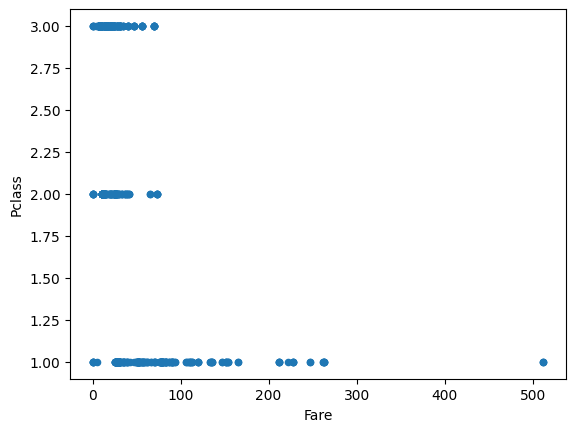

In [325]:
# Generate the scatterplot graph between Fare and Pclass
df.plot.scatter("Fare", "Pclass")

array([[<Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='FamilySize', ylabel='Survived'>],
       [<Axes: xlabel='Survived', ylabel='Pclass'>,
        <Axes: xlabel='Pclass', ylabel='Pclass'>,
        <Axes: xlabel='Age', ylabel='Pclass'>,
        <Axes: xlabel='Fare', ylabel='Pclass'>,
        <Axes: xlabel='FamilySize', ylabel='Pclass'>],
       [<Axes: xlabel='Survived', ylabel='Age'>,
        <Axes: xlabel='Pclass', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Fare', ylabel='Age'>,
        <Axes: xlabel='FamilySize', ylabel='Age'>],
       [<Axes: xlabel='Survived', ylabel='Fare'>,
        <Axes: xlabel='Pclass', ylabel='Fare'>,
        <Axes: xlabel='Age', ylabel='Fare'>,
        <Axes: xlabel='Fare', ylabel='Fare'>,
        <Axes: xlabel='FamilySize', ylabel='Fare'>],
       

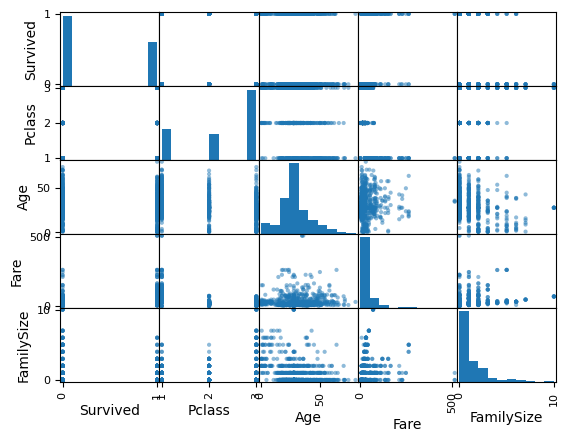

In [326]:
# Create the dispersion matrix for the df
pd_plotting.scatter_matrix(df)

## Qualitative - Qualitative

In [327]:
# Create a cross-tabulation table showing the frequency distribution of 'Sex' versus 'Embarked'
pd.crosstab(df.Sex, df.Embarked)

Embarked,C,Q,S
Sex,,,
female,73,36,205
male,95,41,441


In [328]:
# Add a column to this matrix to calculate the sum
pd.crosstab(df.Sex, df.Embarked, margins=True)

Embarked,C,Q,S,All
Sex,,,,
female,73,36,205,314
male,95,41,441,577
All,168,77,646,891


In [329]:
# Normalize values
pd.crosstab(df.Sex, df.Embarked, normalize = True)

Embarked,C,Q,S
Sex,,,
female,0.081930,0.040404,0.230079
male,0.106622,0.046016,0.494949


In [330]:
# Normalize values ​​by index
pd.crosstab(df.Sex, df.Embarked, normalize = "index")

Embarked,C,Q,S
Sex,,,
female,0.232484,0.114650,0.652866
male,0.164645,0.071057,0.764298


In [331]:
# Add a total row
pd.crosstab(df.Sex, df.Embarked, normalize = "index", margins=True)

Embarked,C,Q,S
Sex,,,
female,0.232484,0.114650,0.652866
male,0.164645,0.071057,0.764298
All,0.188552,0.086420,0.725028


In [332]:
# Normalize table values ​​by column
pd.crosstab(df.Sex, df.Embarked, normalize = "columns")

Embarked,C,Q,S
Sex,,,
female,0.434524,0.467532,0.317337
male,0.565476,0.532468,0.682663


In [333]:
pd.crosstab(df.Sex, df.Embarked, normalize = "columns", margins=True)

Embarked,C,Q,S,All
Sex,,,,
female,0.434524,0.467532,0.317337,0.352413
male,0.565476,0.532468,0.682663,0.647587


In [334]:
t = pd.crosstab(df.Sex, df.Embarked)
# Perform the Chi-squared test of independence on the cross-tabulation table `t`
scipy.stats.chi2_contingency(t)

Chi2ContingencyResult(statistic=12.91702420065256, pvalue=0.00156712570238841, dof=2, expected_freq=array([[ 59.20538721,  27.13580247, 227.65881033],
       [108.79461279,  49.86419753, 418.34118967]]))

<Axes: xlabel='Sex'>

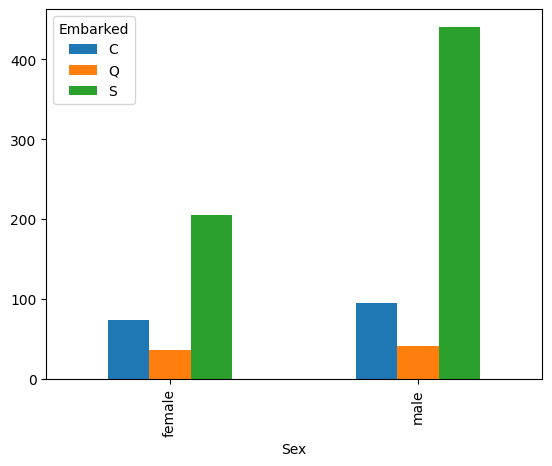

In [335]:
# Represent the bar chart between the sex and Embarked variables
t = pd.crosstab(df.Sex, df.Embarked) #Solution
t.plot.bar() #Solution

<Axes: xlabel='Sex'>

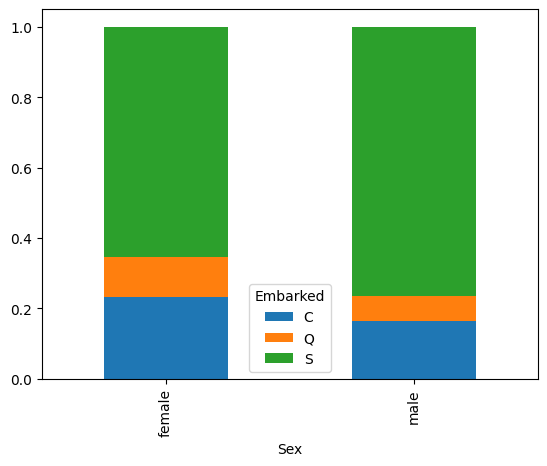

In [336]:
# Using a normalized crosstab by row
t = pd.crosstab(df.Sex, df.Embarked, normalize="index") #Solution
t.plot.bar(stacked=True)

array([<Axes: ylabel='C'>, <Axes: ylabel='Q'>, <Axes: ylabel='S'>],
      dtype=object)

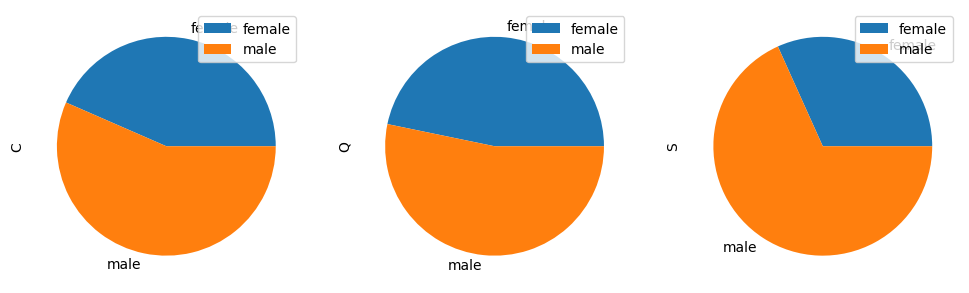

In [337]:
t = pd.crosstab(df.Sex, df.Embarked)
t.plot.pie(subplots=True, figsize = (12, 6))